# PUNTO 6 | QUANTUM MECHANICS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
xmin, xmax = -5, 5
x = np.linspace(xmin, xmax, N)
h = x[1] - x[0]

In [3]:
def V(x):
    m = 1
    omega = 1
    return (1/2) * m * (omega**2) * (x**2)

In [4]:
def V_gaussian(x):
    return -10 * np.exp(-x**2 / 20)

In [5]:
def V_rational(x):
    return -4 / (1 + x**2)**2

In [6]:
def Numerov(x, V, E):
    
    psi = np.zeros_like(x)
    psi[1] = 1e-5

    for i in range(1, len(x) - 1):
        Rn_plus = 2 * (V(x[i + 1]) - E)
        Rn = 2 * (V(x[i]) - E)
        Rn_minus = 2 * (V(x[i - 1]) - E)

        K_plus = 1 - h**2 / 12 * Rn_plus
        K_mid = 2 * (1 + 5*h**2 / 12 * Rn)
        K_minus = 1 - h**2 / 12 * Rn_minus

        psi[i + 1] = (K_mid * psi[i] - K_minus * psi[i - 1]) / K_plus

    return psi

In [7]:
def Energy_L(dE_i=0.1, dE_r=0.001, E_max=10):
    
    def F_Energies(dE, E_values, E_start=0, E_end=E_max, refine=False):
        
        E = E_start
        last_psi_end = None
        
        while E <= E_end:
            psi = Numerov(x, V, E)
            psi_end = psi[-1]

            if last_psi_end is not None and psi_end * last_psi_end < 0:
                if refine:
                    E_values.append(E - dE / 2)
                else:
                    E_values.append(E)

            last_psi_end = psi_end
            E += dE

    E_values1 = []
    F_Energies(dE_i, E_values1)
    E_values2 = []
    
    for E_approx in E_values1:
        E_start = E_approx - dE_i
        E_end = E_approx + dE_i
        F_Energies(dE_r, E_values2, E_start, E_end, refine=True)

    return E_values2

E_values2 = Energy_L()

print('Los valores propios de la función son: ')
print(E_values2)

Los valores propios de la función son: 
[0.5005000000000001, 1.5005000000000002, 2.5005000000000006, 3.5005000000000015, 4.500500000000001, 5.500499999999997, 6.5004999999999935, 7.502499999999991, 8.511499999999979, 9.536499999999961]


In [8]:
Niveles_E = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
E_gaussian = [-9.51, -8.54, -7.62, -6.74, -5.89]
E_rational = [-0.6985,-2.4713, -0.4264]

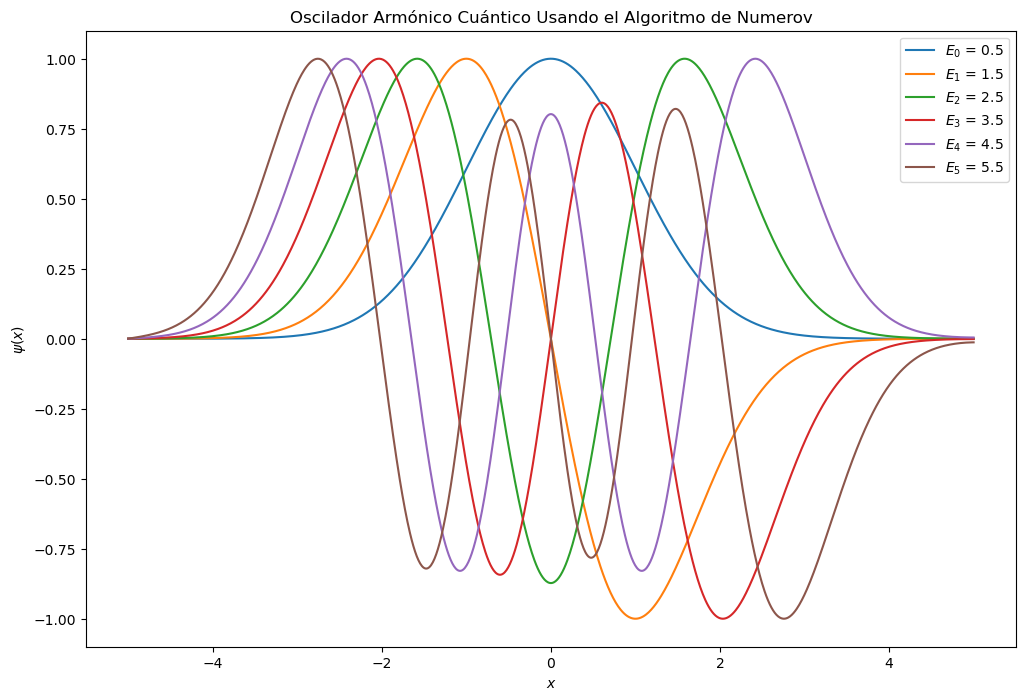

In [9]:
plt.figure(figsize=(12, 8))

for i, E in enumerate(Niveles_E):
    psi = Numerov(x, V, E)
    psi_normalized = psi / np.max(np.abs(psi))
    plt.plot(x, psi_normalized, label=f'$E_{{{i}}}$ = {E:.1f}')

plt.title('Oscilador Armónico Cuántico Usando el Algoritmo de Numerov')
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.legend()
plt.show()

In [10]:
def Energy_g(dE_i=0.1, dE_r=0.001, E_max=0):
    
    def F_Energies(dE, E_values, E_start=-10, E_end=E_max, refine=False):
        
        E = E_start
        last_psi_end = None
        
        while E <= E_end:
            psi = Numerov(x, V_gaussian, E)
            psi_end = psi[-1]

            if last_psi_end is not None and psi_end * last_psi_end < 0:
                if refine:
                    E_values.append(E - dE / 2)
                else:
                    E_values.append(E)

            last_psi_end = psi_end
            E += dE

    E_values1 = []
    F_Energies(dE_i, E_values1)
    E_values_g = []
    
    for E_approx in E_values1:
        E_start = E_approx - dE_i
        E_end = E_approx + dE_i
        F_Energies(dE_r, E_values_g, E_start, E_end, refine=True)

    return E_values_g

E_values_g = Energy_g()

print('Los estados propios del potencial gaussiano son: ')
print(E_values_g)

Los estados propios del potencial gaussiano son: 
[-9.509500000000052, -8.547500000000035, -7.6244999999999825, -6.741499999999991, -5.898500000000014, -5.094500000000015, -4.318499999999992, -3.5435000000000274, -2.7255000000000287, -1.8285000000000273, -0.8335000000000186]


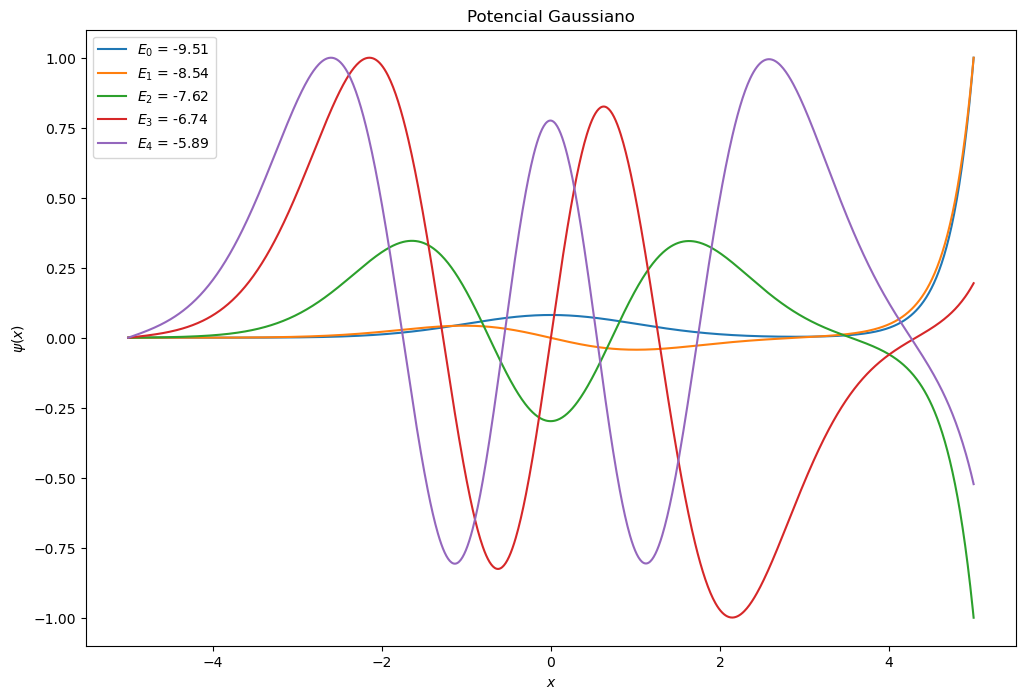

In [11]:
plt.figure(figsize=(12, 8))

for i, E in enumerate(E_gaussian):
    psi = Numerov(x, V_gaussian, E)
    psi_normalized = psi / np.max(np.abs(psi))
    plt.plot(x, psi_normalized, label=f'$E_{{{i}}}$ = {E:.2f}')

plt.title('Potencial Gaussiano')
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.legend()
plt.show()

In [12]:
def Energy_r(dE_i=0.1, dE_r=0.001, E_max=0):
    
    def F_Energies(dE, E_values, E_start=-10, E_end=E_max, refine=False):
        
        E = E_start
        last_psi_end = None
        
        while E <= E_end:
            psi = Numerov(x, V_rational, E)
            psi_end = psi[-1]

            if last_psi_end is not None and psi_end * last_psi_end < 0:
                if refine:
                    E_values.append(E - dE / 2)
                else:
                    E_values.append(E)

            last_psi_end = psi_end
            E += dE

    E_values1 = []
    F_Energies(dE_i, E_values1)
    E_values_r = []
    
    for E_approx in E_values1:
        E_start = E_approx - dE_i
        E_end = E_approx + dE_i
        F_Energies(dE_r, E_values_r, E_start, E_end, refine=True)

    return E_values_r

E_values_r = Energy_r()

print('Los estados propios del potencial racional son: ')
print(E_values_r)

Los estados propios del potencial racional son: 
[-2.4715000000000233, -0.4255000000000187]


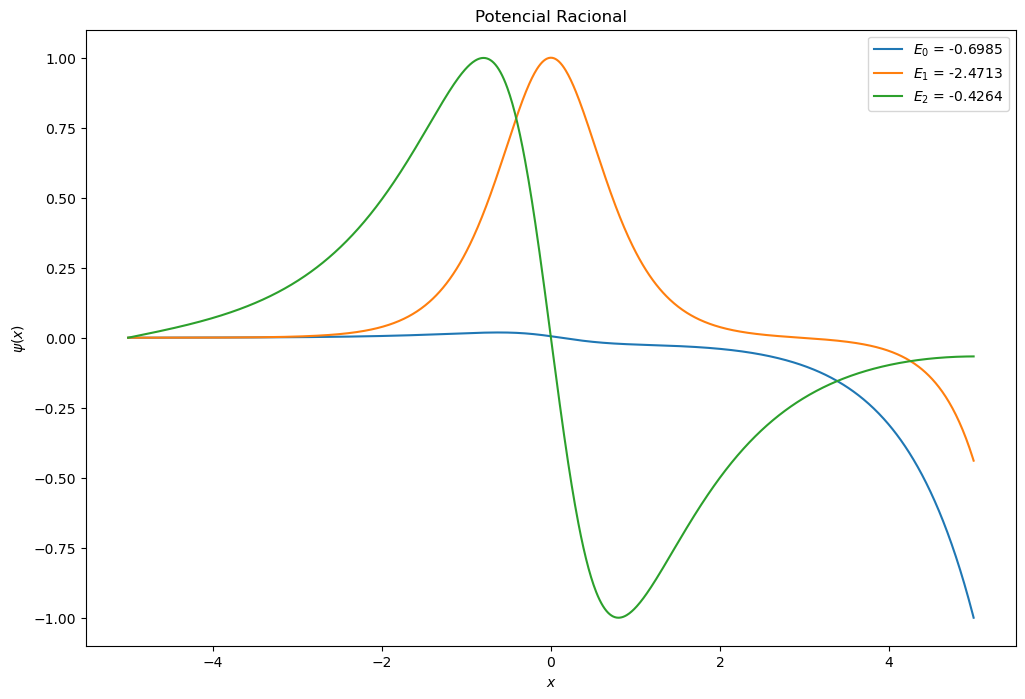

In [13]:
plt.figure(figsize=(12, 8))

for i, E in enumerate(E_rational):
    psi = Numerov(x, V_rational, E)
    psi_normalized = psi / np.max(np.abs(psi))
    plt.plot(x, psi_normalized, label=f'$E_{{{i}}}$ = {E:.4f}')

plt.title('Potencial Racional')
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.legend()
plt.show()

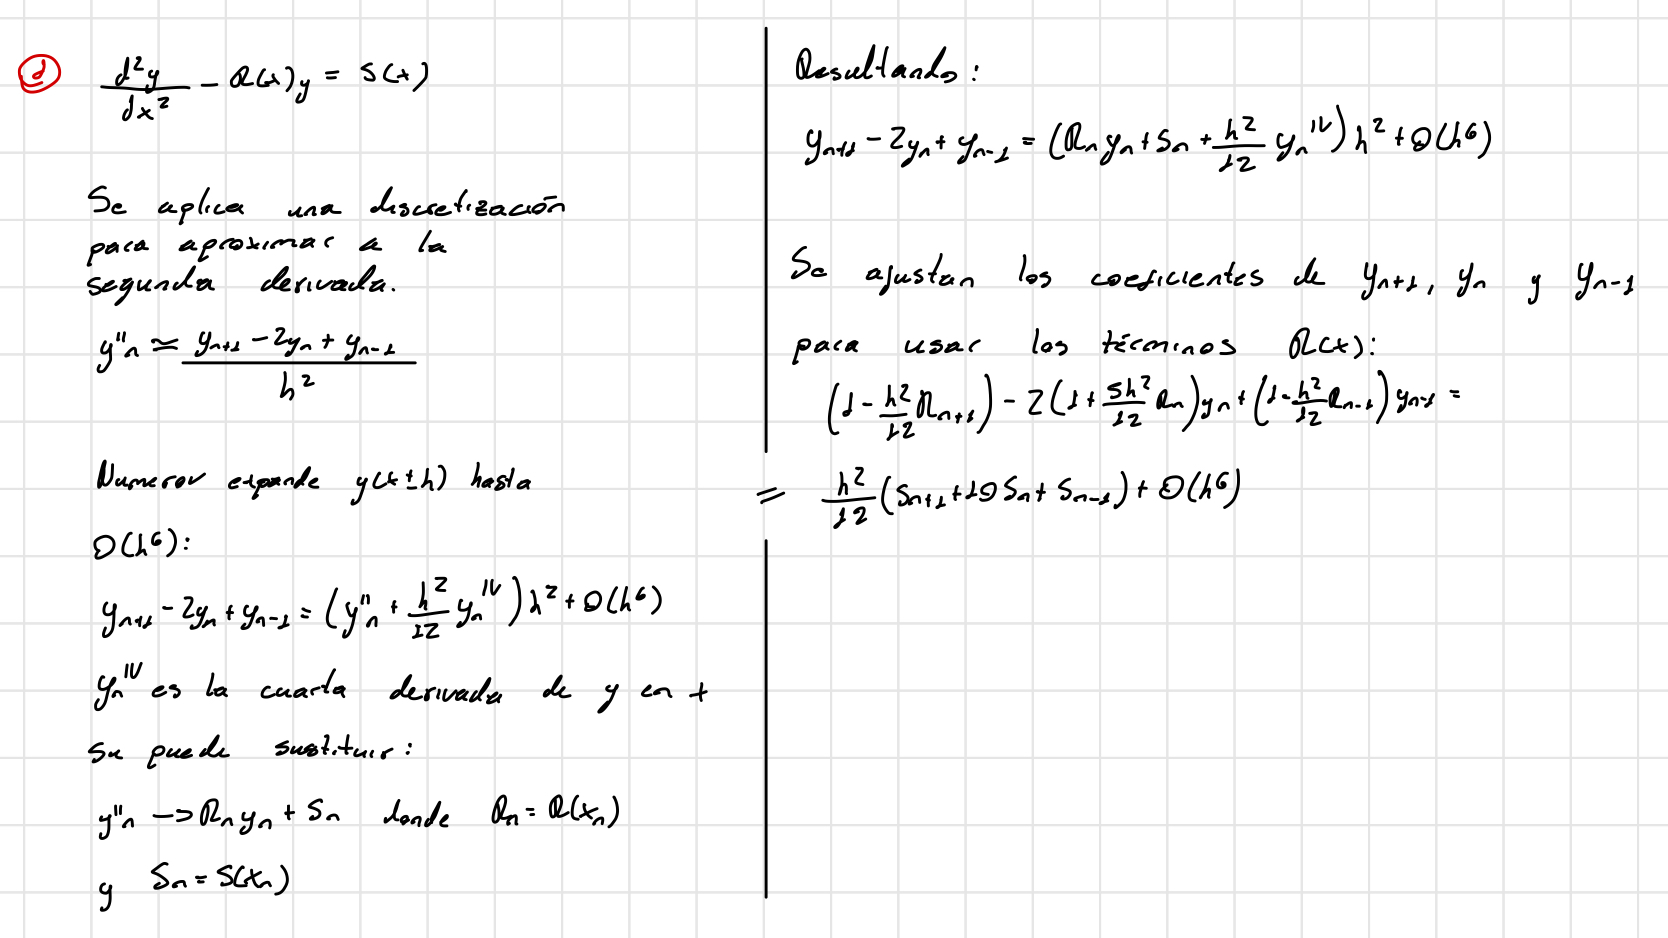